In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
x=cancer.data
y=cancer.target
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size=0.2, random_state=42)

In [0]:
class SingleLayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses =[]

  def forpass(self, x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(slef, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0],1)), x]

  def activation(self, z):
    a= 1/(1+np.exp(-z))
    return a

  def fit(self, x, y, epochs=200):
    self.w = np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i]-a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a) +(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self, x):
      z=[self.forpass(x_i) for x_i in x]
      return np.array(z) >0

  def score(self, x, y):
      return np.mean(self.predict(x)==y)

In [13]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.9298245614035088

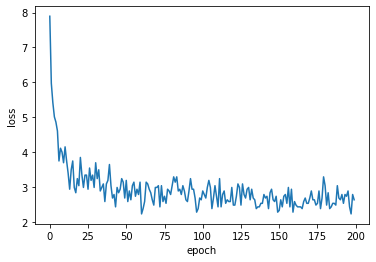

In [14]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()